In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [16]:
#настройки графиков по умолчанию
sns.set (
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(20,7)}
)

In [29]:
avocado_mean = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/avocado_mean.csv')

1) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.



In [24]:
avocado_mean.AveragePrice.rolling(3).mean().max()

1.8493209876543204

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

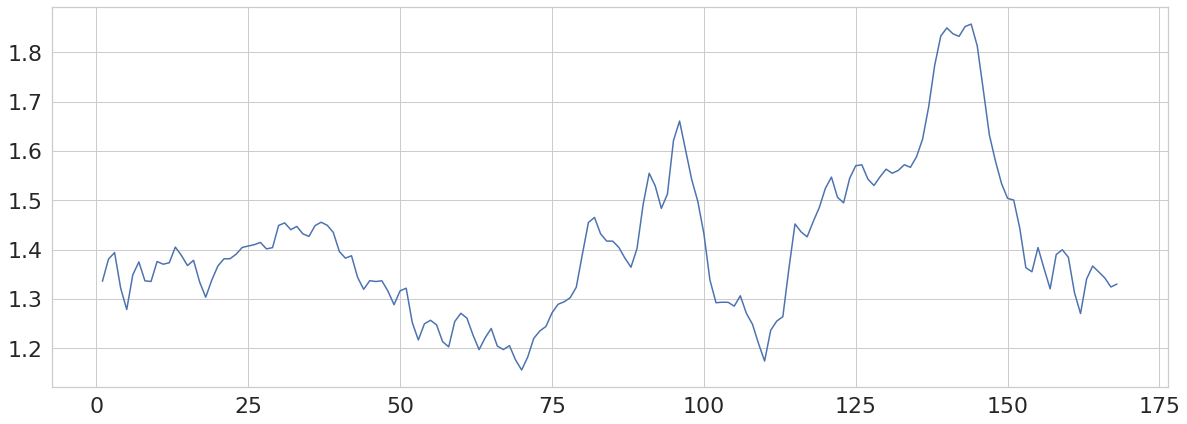

In [25]:
df.AveragePrice.rolling(2).mean().plot()


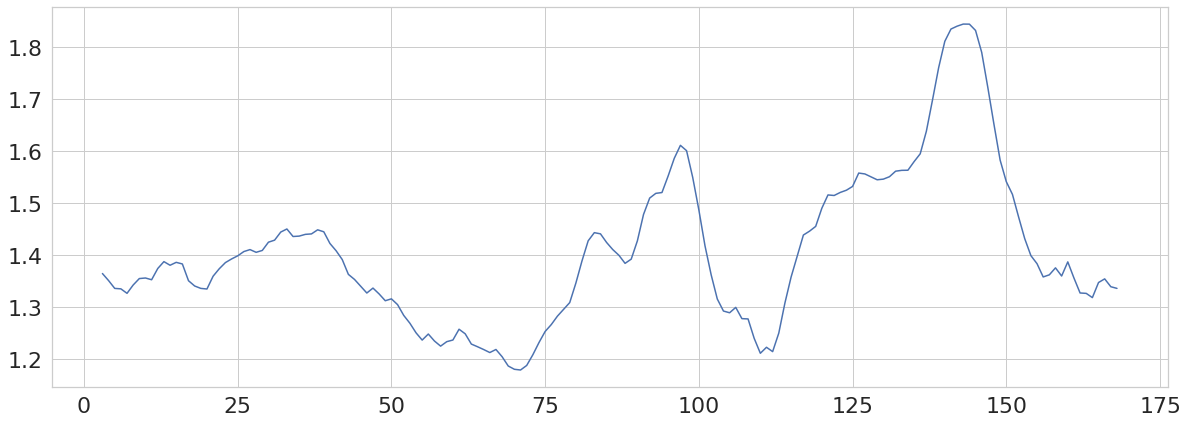

In [26]:
df.AveragePrice.rolling(4).mean().plot()


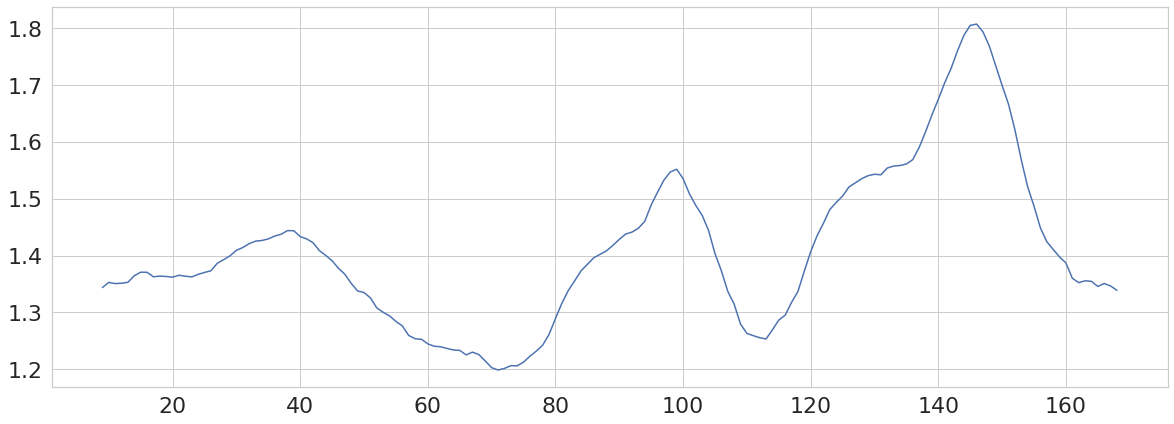

In [27]:
df.AveragePrice.rolling(10).mean().plot()


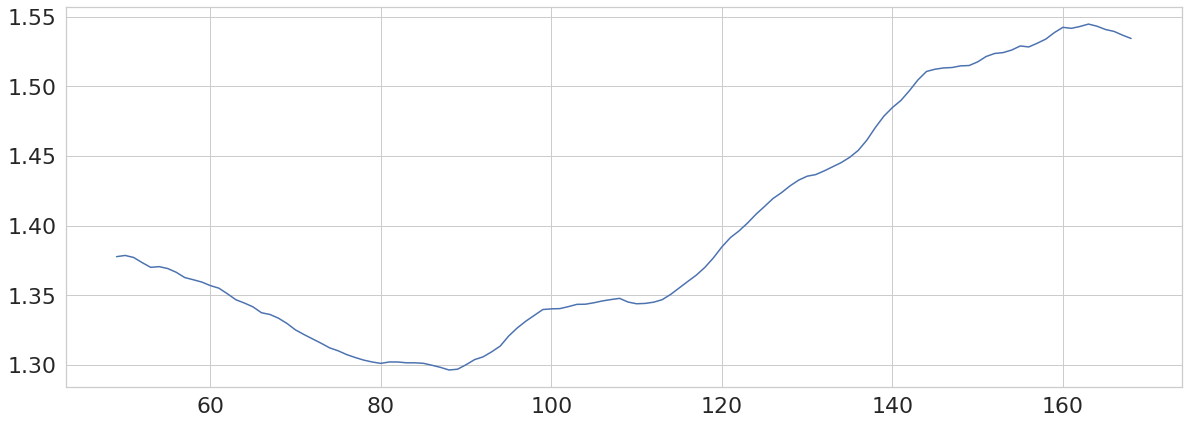

In [28]:
df.AveragePrice.rolling(50).mean().plot()

Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

Данные записаны в avocado_mean.

In [36]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [38]:
avocado_ewm = avocado_mean.ewm(span = 2).mean()

In [39]:
avocado_ewm

,AveragePrice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758
...,...
164,1.356212
165,1.352194
166,1.340793
167,1.322734


И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [81]:
avocado_full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/avocado_full.csv', index_col = 0)

In [82]:
chicago = avocado_full[(avocado_full.type == 'organic') & (avocado_full.region == 'Chicago')]

In [93]:
chicago.groupby('AveragePrice')


In [109]:
gg_1 = chicago.AveragePrice.rolling(4).mean().round(3)
gg_2 = chicago.AveragePrice.ewm(span = 4).mean().round(3)

#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(gg_1, title = 'rolling')
fig.show()
fig = px.line(gg_2, title = 'ew')
fig.show()

Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:
Запишите данные из файла в переменную df. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/delays.csv')

In [3]:
df.delay  = df.delay.str.replace ('-', '')

In [4]:
df.delay = pd.to_timedelta(df.delay)

Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [29]:
df['delay_categorical'] = pd.cut(df.delay, 3)

Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
 'more than 3 days' – больше 3 дней

In [43]:
df['delay_categorical'] = pd.cut(df.delay, bins =  pd.to_timedelta(['0d','1d','2d','3d','106751d']),
                                 labels = ['less than 1 day','1-2 days','2-3 days','more than 3 days'] )

In [41]:
df['delay_categorical'] = pdd.cut(df.delay, bins =  pd.to_timedelta(cut_off), labels = labelz)

Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

In [50]:
giga = df.groupby('delay_categorical',as_index = False)\
    .agg({'client_id':'count'})

In [51]:
giga

,delay_categorical,client_id
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


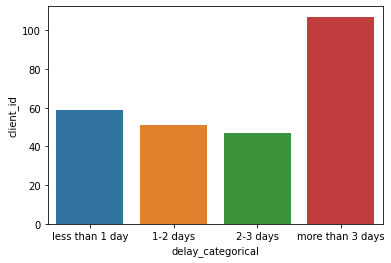

In [52]:
sns.barplot(x=giga.delay_categorical, y =giga.client_id )